# Исследование рынка российского кинопроката

**Задачи проекта:**
    
    Используя данные государственного портала и сервиса “КиноПоиск”, провести исследование рынка российского кинопроката, изучить текущие тренды и визуализировать полученные результаты.

**Описание проекта:**
    
Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Исследовать фильмы, которые получили государственную поддержку. Выяснить, насколько такие фильмы интересны зрителю.

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**План работы:**
    
    1. Загрузка файлов с данными и объединение их в один датафрейм
    2. Предобработка данных:
        - проверка типов данных;
        - изучение пропусков в датафрейме
        - изучение дубликатов в датафрейме
        - изучение категориальных значений
        - проверка количественных значений
        - добавление новых столбцов
    3. Исследовательский анализ данных
    4. Исследование фильмы, которые получили государственную поддержку
    5. Общий вывод по исследованию

## Загрузка файлов с данными и объединение их в один датафрейм


In [1]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib
import warnings #импортируем модуль управления предупреждениями
warnings.filterwarnings('ignore') #ставим фильтр для игнорирования предупреждений

In [2]:
data_1 = pd.read_csv('/datasets/mkrf_movies.csv') #открываем файл mkrf_movies.csv
data_2 = pd.read_csv('/datasets/mkrf_shows.csv') #открываем файл mkrf_shows.csv

In [3]:
data_1.info() #выводим на экран общую информацию о датафрейме_1 для изучения возможности объединения датафреймов
data_2.info() #выводим на экран общую информацию о датафрейме_ 2 для изучения возможности объединения датафреймов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
#в датафрейме_1 удаляем одну строку, где номер прокатного удостоверения 'нет', 
#так как она выдает ошибку при смене типов данных
data_1 = data_1.loc[data_1['puNumber'] != 'нет']

In [5]:
#в столбце puNumber датафрейма_1 меняем тип данных на вещественный
data_1['puNumber'] = pd.to_numeric(data_1['puNumber'], errors='raise') 

In [6]:
data_1.dtypes #проверка результатов - смены типа данных в столбце puNumber

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

In [7]:
data = data_1.merge(data_2, on='puNumber', how='left') #объединяем датафреймы 1 и 2 в единый датафрейм data

In [8]:
data.info() #выводим на экран общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
data.head() #выводим на экран первые 5 строк датафрейма


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Выводы по пункту 1:**

В результате объединения двух датафреймов получили новый датафрейм, в котором даже на основании основной информации видно много проблем с данными: неверные типы данных, большое количество пропусков. Проведем предварительный анализ и предобработку, и посмотрим, все ли столбцы необходимо обработать в части исключения вышеуказанных проблем с данными. В столбце puNumber нам пришлось удалить одну строку и изменить тип данных уже на этапе объединения датафреймов, так как, если не устранить эти проблемы, объединение датафреймов происходит некорректно. 

## Предобработка данных

### Проверка типов данных

In [10]:
data.dtypes #выводим на экран информацию о типах данных в столбцах датафрейма

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [11]:
#меняем тип данных в столбце show_start_date на datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')

In [12]:
data['ratings'].unique() #выводим уникальные значения столбца ratings 

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [13]:
#создаем функцию, с помощью которой обрабатываем значения с процентами:
#отбрасываем % в значениях, меняем значения на тип float и делим на 10.
def type_ratings(line):
    try:
        if line[2] == '%':
            string = line[:2]
            string = float(string) / 10
            return string
        else:
            line = float(line)
            return line
    except:
        return line      
        
data['ratings'] = data['ratings'].apply(type_ratings) #применяем функцию type_ratings к столбцу ratings 

In [14]:
data['ratings'].unique() #проверка результатов изменения типа данных и значений в столбце ratings

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [15]:
data.dtypes #итоговая проверка результатов смены типов данных в столбцах датафрейма

title                                 object
puNumber                               int64
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

**Выводы по пункту 2.1.:**

В результате предобработки данных преобразовали тип данных в столбце show_start_date, так как этот столбец необходим нам в дальнейшем для выделения в отдельный столбец года, в котором был прокат фильма.
Также, проанализировав столбец ratings, исключили аномальные значения с %, привели тип данных к float64, и перевели в дроби.

### Изучение пропусков в датафрейме

In [16]:
data.isna().sum() #считаем количество пропусков в столбцах датафрейма

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [17]:
print('Пропуски до:', data['director'].isna().sum()) #выводим на экран количество пропусков до предобработки в столбце director

data['director'] = data['director'].fillna('неизвестно') #заменяем пропуски в столбце genres заглушкой "неизвестно" 

print('Пропуски после:', data['director'].isna().sum()) #выводим на экран количество пропусков после предобработки в столбце director

Пропуски до: 9
Пропуски после: 0


In [18]:
print('Пропуски до:', data['genres'].isna().sum())#выводим на экран количество пропусков до предобработки в столбце genres


data['genres'] = data['genres'].fillna('неизвестно') #заменяем пропуски в столбце genres заглушкой "неизвестно" 

print('Пропуски после:', data['genres'].isna().sum())#выводим на экран количество пропусков после предобработки в столбце genres

Пропуски до: 975
Пропуски после: 0


In [19]:
#выводим для анализа строки, где ненулевая гос.поддержка и имеются пропущенные значения в столбце ratings
data.loc[((data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)) & (data['ratings'].isna())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,неизвестно,2.814000e+04
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.0,25000000.0,37371262.0,Министерство культуры,NaN,неизвестно,1.982000e+04
2450,ПРАЗДНИК НЕПОСЛУШАНИЯ,111016215,2015-08-28 12:00:00+00:00,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,"В.Харченко, А.Волков",Ф.Попов,«6+» - для детей старше 6 лет,0.0,34000000.0,49071428.0,Министерство культуры,NaN,неизвестно,1.825100e+05
2816,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУ...,111019315,2015-11-17 12:00:00+00:00,Художественный,"ООО ""Студия Ортодокс""",Россия,Е.Баранов,"Л.Калинский, И.Охлобыстин, Г.Палагаев",«16+» - для детей старше 16 лет,25000000.0,15000000.0,74071918.0,Фонд кино,NaN,неизвестно,1.101181e+07
2998,Жили-были мы,111008716,2016-05-12 12:00:00+00:00,Художественный,"ООО ""Русские Золотые Серии""",Россия,А.Чернакова,"А.Чернакова, Ю.Сапронов",«0+» - для любой зрительской аудитории,0.0,35000000.0,69883049.0,Министерство культуры,NaN,неизвестно,6.588700e+05
3060,Первая Мировая война WWI,111000716,2016-01-25 12:00:00+00:00,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,«12+» - для детей старше 12 лет,0.0,30000000.0,45538655.0,Фонд кино,NaN,неизвестно,8.781000e+04
3384,О любви (2017),111018816,2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000.0,35000000.0,70086439.0,"Министерство культуры, Фонд кино",NaN,неизвестно,1.133241e+07
3388,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,111005017,2017-06-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""ВГИК - Дебют""",Россия,А.Хант,"В.Мадышев, Ф.Попов",«18+» - запрещено для детей,0.0,25000000.0,38500000.0,Министерство культуры,NaN,неизвестно,5.503875e+06
3613,Три сестры,111004417,2017-06-09 12:00:00+00:00,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.0,25000000.0,37878787.0,Министерство культуры,NaN,неизвестно,1.067649e+06
3654,О чем молчат французы,111012016,2016-07-22 12:00:00+00:00,Художественный,"ООО ""Киностудия Арго""",Россия,В.Шевельков,"В.Шевельков, М.Бебенина",«12+» - для детей старше 12 лет,0.0,30000000.0,46153887.0,Министерство культуры,NaN,неизвестно,9.565000e+04


In [20]:
data.isna().sum() #проверка результатов - считаем количество пропусков в столбцах датафрейма

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    0
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                      0
box_office               4327
dtype: int64

**Выводы по пункту 2.2.:**

В результате предварительной оценки по объему работ исследовательского анализа в категориальных переменных заполнили пропуски только в столбцах director и genres на фразу "неизвестно", так как пропуски не дадут возможность добавить новые столбцы с основным жанром фильма и главным режиссером. Остальные столбцы с пропусками в категориальных переменных не повлияют на дальнейший анализ, поэтому оставили их незаполненными.

Что касается пропусков в количественных переменных, то проанализировав, пришла к выводу, что пропуски в столбцах refundable_support, nonrefundable_support, budget связаны с тем, что по этим фильмам нет информации о гос.поддержке и бюджете, а основной исследовательский анализ мы проводим только по строкам с наличием гос.поддержки, поэтому смысла в заполнении пропусков в этих столбцах нет.
Аналогично, нет смысла заполнять пропуски в столбце box_office, так как пропуски образовались в результате объединения датафреймов. Соответственно, у этих фильмов, по которым образовался Nan, не было информации о кассовых сборах.
Что касается столбца ratings, то строк с гос.поддержкой(которые нужны для анализа) и одновременным наличием пропусков в столбце ratings, всего 16 шт., что по отношению к общему количеству строк с гос.поддержкой (определяем в пункте 1.4.) составляет всего 4,8%. Эти строки убираем из датафрейма в пункте 1.4. перед работой со столбцом ratings.

### Изучение дубликатов в датафрейме


In [21]:
print('Количество дубликатов:', data.duplicated().sum())#считаем количество дубликатов в столбцах датафрейма


Количество дубликатов: 0


In [22]:
data['title'].value_counts()#выводим уникальные значения столбца title

День святого Валентина_                               5
Белоснежка и охотник                                  4
Красавчик-2                                           4
Рапунцель: Запутанная история                         4
Кошмар на улице Вязов /Фильм ужасов/                  4
                                                     ..
Достали!                                              1
МУЛЬТ в кино. Выпуск № 14                             1
Стажёр                                                1
Мэхэббэт - ул йорэк эше (Любовь - это дело сердца)    1
Машины песенки. Серия "Когда цветут кактусы"          1
Name: title, Length: 6771, dtype: int64

In [23]:
data['puNumber'].value_counts()#выводим уникальные значения столбца puNumber

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121008915    1
121009015    1
111004115    1
211047015    1
124010719    1
Name: puNumber, Length: 7483, dtype: int64

В результате предобработки данных было выявлено, что строк-дубликатов в датафрейме нет. Что касается неявных дубликатов, то в столбце title повторяются фильмы, но прокатные удостоверения у них разные, что говорит о том, что фильм или его римейк выходил в прокат несколько раз. В столбце puNumber повторяются номера прокатных удостоверений (221054410 и 221154310), но фильмы разные. Это, вероятнее всего, ошибка, но, поскольку в наш основной анализ эти фильмы не войдут в связи с отсутствием гос.поддержки, то эти дубликаты оставим, как есть.

### Изучение категориальных значений



In [61]:
data['type'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца type

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [25]:
data['type'] = data['type'].str.strip() #удаляем все пробелы, которые встречаются в начале строк в столбце type 

In [26]:
data['type'].sort_values().unique() #проверка результатов - выводим на экран отсортированные уникальные значения столбца type


array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [27]:
data['title'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца title

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

In [28]:
data['genres'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца genres

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [29]:
data['film_studio'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца film_studio

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [30]:
data['production_country'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца production_country

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [31]:
data['director'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца director

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [32]:
data['producer'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца producer

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

In [33]:
data['age_restriction'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца age_restriction

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [63]:
data['financing_source'].sort_values().unique() #выводим на экран отсортированные уникальные значения столбца financing_source

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

**Выводы по пункту 2.4.:**

В результате анализа категориальных столбцов было выявлено, что почти во всех категориальных столбцах имеются пробелы в начале строки. Методом str.strip() устранили пробелы в столбце type.

А также анализ уникальных значений категориальных столбцов показал, что такие столбцы, как producer, director, film_studio, production_country, genres, title - имеют очень большое количество категорий. Это значительно осложняет предобработку данных в части проверки на неявные дубликаты, на аномальные значения. В связи с этим анализ данных может быть проведен по не совсем корректным значениям и может привести к неверным выводам и результатам. 

### Проверка количественных значений



In [35]:
#выводим на экран срез данных, в которых сумма значений в столбцах refundable_support и nonrefundable_support больше значения в столбце budget
data.query('(refundable_support + nonrefundable_support) > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [36]:
#создаем функцию, с помощью которой проверяем: если сумма значений в столбцах refundable_support и nonrefundable_support
#больше, чем значение в столбце budget, то возвращаем сумму значений в столбцах refundable_support и nonrefundable_support
def budget_support(row_values):
    refundable_support = row_values['refundable_support']
    nonrefundable_support = row_values['nonrefundable_support']
    budget = row_values['budget']
    support = refundable_support + nonrefundable_support
    if support > budget:
        return support
    return budget

data['budget'] = data.apply(budget_support, axis=1) #применяем функцию budget_support к датафрейму, в результате обрабатывая значения в столбце budget

In [37]:
#проверка результатов - выводим на экран срез данных, в которых сумма значений в столбцах refundable_support и nonrefundable_support больше значения в столбце budget
data.query('(refundable_support + nonrefundable_support) > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Выводы по пункту 2.5:**

В столбцах с количественными переменными refundable_support, nonrefundable_support и budget выявлены 17 строк, в которых сумма гос.поддержки больше, чем бюджет фильма. Это явная ошибка, так как бюджет фильма может быть либо равен, либо больше гос.поддержки. Устранили эту ошибку с помощью функции - обеспечили равенство общей суммы гос.поддержки и бюджета в этих строках.

### Добавление новых столбцов

In [38]:
#создаем новый столбец year_rental, путем получения значения года из show_start_date
data['year_rental'] = pd.DatetimeIndex(data['show_start_date']).year 

In [39]:
#создаем функцию, с помощью которой разбиваем строку с разделителями в столбце и берем только первое значение
def first_value(value):
    return value.split(",")[0]

#создаем новый столбец, в который добавляем значения столбца director, обработанные функцией first_value
data['main_director'] = data['director'].apply(first_value)
#создаем новый столбец, в который добавляем значения столбца genres, обработанные функцией first_value
data['main_genre'] = data['genres'].apply(first_value)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [64]:
#считаем долю гос.поддержки, складывая значения столбцов refundable_support и nonrefundable_support 
#и деля их на значение столбца budget, результат округляем до сотых.
data['share_support'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).round(2)  

In [41]:
data.head() #выводим на экран первые 5 строк датафрейма для проверки добавления столбцов

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_rental,main_director,main_genre,share_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


## Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год, посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [42]:
#создаем сводную таблицу с группировкой по годам, в которой считаем количество фильмов в прокате всего
pivot_year_total = data.pivot_table(index='year_rental', values='puNumber',aggfunc='count')
#даем новое наименование получившемуся столбцу
pivot_year_total.columns = ['Количество фильмов в прокате']
#создаем отдельный датафрейм, в котором оставляем только фильмы, по которым либо ненулевая гос.поддержка,либо ненулевые кассовые сборы
cinema_rental = data.loc[((data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0) | (data['box_office'] > 0))]
#на основании нового датафрейма cinema_rental создаем сводную таблицу с группировкой по годам, 
#где считаем количество фильмов в прокате в кинотеатрах
cinema_rental_year = cinema_rental.pivot_table(index='year_rental', values='puNumber', aggfunc='count')
#даем новое наименование получившемуся столбцу
cinema_rental_year.columns = ['Количество фильмов в прокате в кинотеатрах']
#добавляем столбец "Количество фильмов в прокате в кинотеатрах", в сводную таблицу pivot_year_total 
pivot_year_total['Количество фильмов в прокате в кинотеатрах'] = cinema_rental_year['Количество фильмов в прокате в кинотеатрах']
#считаем долю фильмов в прокате в кинотеатрах, деля значение в столбце 'Количество фильмов в прокате в кинотеатрах'  
#на значение в столбце 'Количество фильмов в прокате' и округляем результат до сотых.
pivot_year_total['Доля фильмов в прокате в кинотеатрах'] = (pivot_year_total['Количество фильмов в прокате в кинотеатрах'] / pivot_year_total['Количество фильмов в прокате']).round(2)
#выводим на экран итоговую сводную таблицу
display(pivot_year_total)

,Количество фильмов в прокате,Количество фильмов в прокате в кинотеатрах,Доля фильмов в прокате в кинотеатрах
year_rental,,,
2010,985,101,0.10
2011,622,109,0.18
2012,593,123,0.21
2013,630,179,0.28
2014,806,273,0.34
2015,705,463,0.66
2016,818,526,0.64
2017,505,359,0.71
2018,891,475,0.53


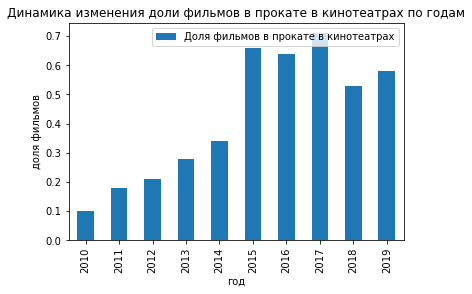

In [43]:
#на основании сводной таблицы pivot_year_total строим столбчатую диаграмму, где отражаемся динамика
#изменения доли фильмов в прокате в кинотеатрах по годам
(
    pivot_year_total.pivot_table(index='year_rental', values='Доля фильмов в прокате в кинотеатрах')
    .plot(kind='bar')
)
plt.title('Динамика изменения доли фильмов в прокате в кинотеатрах по годам')
plt.xlabel('год')
plt.ylabel('доля фильмов')
plt.show;

Исследовательский анализ показал, что наибольшее количество фильмов в прокат выходило в 2010, наименьшее количество фильмов в прокат выходило в 2017 году. При этом доля фильмов в прокате в кинотеатрах в 2017 году наибольшая (71%). Наименьшая доля фильмов в прокате в кинотеатрах - в 2010 году и с каждым последующим годом она повышается практически до 2017 года, затем немного уменьшается. Но следует отметить, что в период с 2010 по 2014 год количество фильмов в прокате в кинотеатрах, а следовательно и доля этих фильмов, очень маленькая, что, вероятно, связано с отсутствием в датафрейме части информации по этим годам.

- Изучим, как менялась динамика проката по годам.

,Сумма кассовых сборов по годам
year_rental,
2010,2428654.00
2011,14102765.00
2012,6955423.00
2013,29799706.20
2014,7444951859.20
2015,39497365196.40
2016,47866299741.91
2017,48563707217.51
2018,49668403134.32


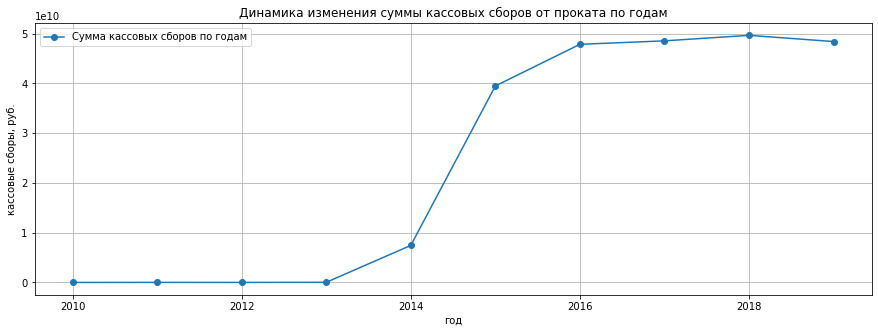

In [44]:
#создаем сводную таблицу с группировкой по годам, где считаем общую сумму кассовых сборов
box_year = data.pivot_table(index='year_rental', values='box_office', aggfunc='sum')
#даем новое наименование получившемуся столбцу
box_year.columns = ['Сумма кассовых сборов по годам']
#убираем экспоненциальные числа
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#выводим на экран сводную таблицу box_year
display(box_year)

#на основании сводной таблицы box_year строим график, где отражаемся динамика
#изменения изменения суммы кассовых сборов от проката по годам
box_year.plot(grid=True, figsize=(15, 5), style='o-')
plt.title('Динамика изменения суммы кассовых сборов от проката по годам')
plt.xlabel('год')
plt.ylabel('кассовые сборы, руб.')
plt.show;

Максимальная сумма сборов от проката была в 2018 году (49 668 403 134,32 руб.) А минимальная сумма сборов была в 2010 году (2 428 654,00 руб.). Но опять же следует отметить, что эта цифра в масштабе страны очень маленькая, что в очередной раз подтверждает, что в датафрейме либо нет части информации, либо,что скорее всего, заведены неверные данные за период с 2010 по 2014 год.

- посчитаем среднюю и медианную сумму сборов для каждого года.

In [65]:
#создаем сводную таблицу с группировкой по годам, в которой считаем среднее и медиану по кассовым сборам
mean_med_box = data.pivot_table(index='year_rental', values='box_office', aggfunc=['mean', 'median'])
#даем новое наименование получившимся столбцам
mean_med_box.columns = ['Среднее по кассовым сборам', 'Медиана по кассовым сборам']
#выводим на экран сводную таблицу mean_med_box
display(mean_med_box)

,Среднее по кассовым сборам,Медиана по кассовым сборам
year_rental,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26684415.27,18160.00
2015,84940570.31,4920933.00
2016,91000569.85,3846679.41
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


Медиана по кассовым сборам максимальная также в 2017 году (9 968 340,00 руб.), минимальная - в 2010 году (1 700 руб.). Среднее по кассовым сборам тоже в 2017 году максимальное - 136 032 793,33 руб. и минимальное в 2010 году - 23 130,04 руб. Разброс между медианным и средним значением показывает, как сильно зависит от разброса значений среднее арифметическое.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

In [46]:
#от исходного датафрейма делаем срез данных, в котором год больше 2014 и группируем его по возрастному ограничению
# и считаем медиану по кассовому сбору
(data
 .query('year_rental > 2014')
 .groupby('age_restriction').agg({'box_office': 'median'})
)

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,2943318.70
«12+» - для детей старше 12 лет,5065044.25
«16+» - для детей старше 16 лет,5600007.00
«18+» - запрещено для детей,6154439.17
«6+» - для детей старше 6 лет,13736207.98


In [47]:
#от исходного датафрейма делаем срез данных, в котором год больше 2014 и группируем его по возрастному ограничению
# и году, и считаем медиану по кассовому сбору
(data
 .query('year_rental > 2014')
 .groupby(['year_rental', 'age_restriction']).agg({'box_office': 'median'})
)

box_office
year_rental age_restriction                                   
2015        «0+» - для любой зрительской аудитории  2943318.70
            «12+» - для детей старше 12 лет        15351562.50
            «16+» - для детей старше 16 лет         4676819.40
            «18+» - запрещено для детей             4616614.70
            «6+» - для детей старше 6 лет          20380982.20
2016        «0+» - для любой зрительской аудитории  2571294.10
            «12+» - для детей старше 12 лет         4690635.25
            «16+» - для детей старше 16 лет         5133021.74
            «18+» - запрещено для детей             6107001.74
            «6+» - для детей старше 6 лет           3026256.15
2017        «0+» - для любой зрительской аудитории 22178956.00
            «12+» - для детей старше 12 лет         9010548.00
            «16+» - для детей старше 16 лет         9702077.00
            «18+» - запрещено для детей             8212677.00
            «6+» - для детей старше 6 лет          51992103.00
2018        «0+» - для любой зрительской аудитории  3616937.28
            «12+» - для детей старше 12 лет         8931965.66
            «16+» - для детей старше 16 лет         9010638.62
            «18+» - запрещено для детей             7179466.00
            «6+» - для детей старше 6 лет          14688850.32
2019        «0+» - для любой зрительской аудитории  3885434.50
            «12+» - для детей старше 12 лет         3405545.76
            «16+» - для детей старше 16 лет         3210717.81
            «18+» - запрещено для детей             5603216.55
            «6+» - для детей старше 6 лет          12875350.34

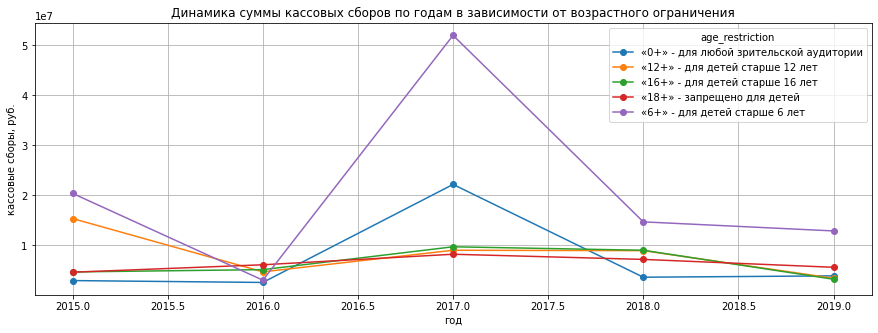

In [48]:
#на основании сводной таблицы строим линейный график, где отражаемся динамика
#изменения суммы кассовых сборов по годам в зависимости от возрастного ограничения
(data
 .query('year_rental > 2014')
 .pivot_table(index='year_rental', columns='age_restriction', values='box_office', aggfunc='median')
 .plot(figsize=(15, 5), grid=True, style='o-')
)  
plt.title('Динамика суммы кассовых сборов по годам в зависимости от возрастного ограничения')
plt.xlabel('год')
plt.ylabel('кассовые сборы, руб.')
plt.show;

Проанализировав влияние возрастного ограничения на сумму кассовых сборов по годам, выявлено, что наибольшие кассовые сборы во всех анализируемых годах, кроме 2016 года, собрали фильмы с возрастным ограничением 6+, и только в 2016 году лидируют по сумме кассовых сборов фильмы 18+. Такое распределение может быть связано с тем, что, возможно, в 2016 году меньше было в прокате качественных, хороших фильмов для детей. Но даже, если рассматривать сумму кассовых сборов без разбивки по годам, то максимальная сумма кассовых сборов была также по фильмам с возрастным ограничением 6+. Минимальная же сумма кассовых сборов собрана по фильмам возрастной категории 0+. Вероятно, это связано с тем, что маленьких детей до 5 лет реже водят в кинотеатры в силу возраста. Также можно отметить, что в 2017 году самая большая сумма кассовых сборов собрана именно от фильмов 6+ и 0+. Видимо, в 2017 году в кинопрокат вышли фильмы для детей, которые пользовались особенно высоким спросом среди населения.

**Выводы по пункту 3.:**

Исследовательский анализ показал, что наибольшее количество фильмов в прокат выходило в 2010, наименьшее количество фильмов в прокат выходило в 2017 году. При этом доля фильмов в прокате в кинотеатрах в 2017 году наибольшая (71%).
Наименьшая доля фильмов в прокате в кинотеатрах  - в 2010 году и с каждым последующим годом она повышается практически до 2017 года, затем немного уменьшается. Но следует отметить, что в период с 2010 по 2014 год количество фильмов в прокате в кинотеатрах, а следовательно и доля этих фильмов, очень маленькая, что, вероятно, связано с отсутствием в датафрейме части информации по этим годам.

Максимальная сумма сборов от проката была в 2018 году (49 668 403 134,32 руб.) А минимальная сумма сборов была в 2010 году (2 428 654,00 руб.). Но опять же следует отметить, что эта цифра в масштабе страны очень маленькая, что в очередной раз подтверждает, что в датафрейме либо нет части информации, либо,что скорее всего, заведены неверные данные за период с 2010 по 2014 год.

Медиана по кассовым сборам максимальная также в 2017 году (9 968 340,00 руб.), минимальная - в 2010 году (1 700 руб.). Среднее по кассовым сборам тоже в 2017 году максимальное - 136 032 793,33 руб. и минимальное в 2010 году - 23 130,04 руб. Разброс между медианным и средним значением показывает, как сильно зависит от разброса значений среднее арифметическое.

Проанализировав влияние возрастного ограничения на сумму кассовых сборов по годам, выявлено, что наибольшие кассовые сборы во всех анализируемых годах, кроме 2016 года, собрали фильмы с возрастным ограничением 6+, и только в 2016 году лидируют по сумме кассовых сборов фильмы 18+. Такое распределение может быть связано с тем, что, возможно, в 2016 году меньше было в прокате качественных, хороших фильмов для детей. Но даже, если рассматривать сумму кассовых сборов без разбивки по годам, то максимальная сумма кассовых сборов была также по фильмам с возрастным ограничением 6+. Минимальная же сумма кассовых сборов собрана по фильмам возрастной категории 0+. Вероятно, это связано с тем, что маленьких детей до 5 лет реже водят в кинотеатры в силу возраста. Также можно отметить, что в 2017 году самая большая сумма кассовых сборов собрана именно от фильмов 6+ и 0+. Видимо, в 2017 году в кинопрокат вышли фильмы для детей, которые пользовались особенно высоким спросом среди населения.

##  Исследование  фильмов, которые получили государственную поддержку


In [49]:
#создаем датафрейм, в котором вошли только фильмы, которые получили гос.поддержку
support_films = data.loc[(data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)]
#выводим размер таблицы support_films
support_films.shape

(332, 20)

In [50]:
#выводим на экран сумму общего объема гос.поддержки с разбивкой на возвратную и невозвратную часть
print('Общий объем государственной поддержки:', (support_films['refundable_support'] + support_films['nonrefundable_support']).sum(), 'руб.')
print('в том числе:')
print('Объем возвратных средств государственной поддержки:', support_films['refundable_support'].sum(), 'руб.')
print('Объем невозвратных средств государственной поддержки:', support_films['nonrefundable_support'].sum(),'руб.')
#выводим на экран среднюю долю гос.поддержки в общем бюджете фильма
print('Средняя доля гос.поддержки в общем бюджете фильма:', support_films['share_support'].median())

Общий объем государственной поддержки: 20200688312.0 руб.
в том числе:
Объем возвратных средств государственной поддержки: 3939000000.0 руб.
Объем невозвратных средств государственной поддержки: 16261688312.0 руб.
Средняя доля гос.поддержки в общем бюджете фильма: 0.615


In [51]:
#создаем сводную таблицу с группировкой по годам, где рассчитываем медиану доли гос.поддержки по годам
(support_films
 .pivot_table(index='year_rental', values='share_support', aggfunc='median')
)

,share_support
year_rental,
2013,0.47
2014,0.58
2015,0.62
2016,0.64
2017,0.52
2018,0.59
2019,0.58


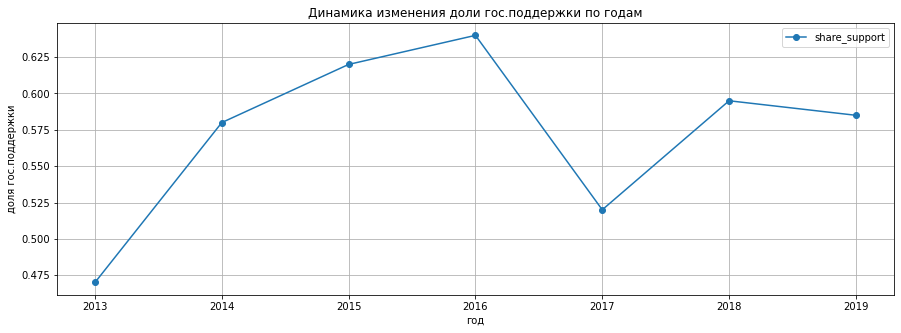

In [52]:
#на основании сводной таблицы строим график, где отражаемся динамика
#изменения доли гос.поддержки по годам
(support_films
 .pivot_table(index='year_rental', values='share_support', aggfunc='median')
 .plot(grid=True, figsize=(15, 5), style='o-')
)
plt.title('Динамика изменения доли гос.поддержки по годам')
plt.xlabel('год')
plt.ylabel('доля гос.поддержки')
plt.show;

Самая низкая доля гос.поддержки была в 2013 году. Далее доля гос.поддержки стабильно росла вплоть до 2016 года (максимальная - 0,64), в 2017 году резко снизилась, но в 2018-2019 годах снова начала расти.

In [53]:
#делаем срез данных датафрейма support_films, где год проката больше 2014 года
support_films_after2015 = support_films.query('year_rental > 2014')

In [54]:
#создаем функцию, с помощью которой проверяем условие: если значение в столбце box_office больше или равно 
#значению в столбце budget, то возвращаем 1(т.е.'окупился'), иначе 0 (т.е. 'не окупился')
def payback(row):
    try:
        if row['box_office'] >= row['budget']:
            return '1'
        else:
            return '0'
    except:
        return 'нет категории'
        
support_films_after2015['payback'] = support_films_after2015.apply(payback, axis=1)#применяем функцию к датафрейму support_films
support_films_after2015.head()#выводим на экран первые 5 строк датафрейма для проверки корректности нового столбца

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year_rental,main_director,main_genre,share_support,payback
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,2015,С.Серегин,мультфильм,0.48,0
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.00,...,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,0.68,1
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,...,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,А.Войтинский,триллер,0.54,1
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,...,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,2015,Д.Федоров,фэнтези,0.70,0
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,...,75000000.00,Фонд кино,6.60,драма,446163511.00,2015,Р.Прыгунов,драма,1.00,1


In [55]:
#меняем тип столбца payback на вещественный
support_films_after2015['payback'] = pd.to_numeric(support_films_after2015['payback'], errors='raise')

In [56]:
#выводим на экран долю фильмов с гос.поддержкой, которые окупились, которые рассчитали, как сумма  1 в столбце 
#payback делится на количество значений в столбце payback, результат округляем до сотых
print('Доля фильмов с гос.поддержкой, которые окупились:',\
      (support_films_after2015['payback'].sum() / support_films_after2015['payback'].count()).round(2))

Доля фильмов с гос.поддержкой, которые окупились: 0.24


In [57]:
#убираем из датафрейма support_films строки с пропусками в столбце ratings
support_films = support_films.loc[~support_films['ratings'].isna()]
support_films.shape #выводим размер таблицы support_films

(316, 20)

In [58]:
#создаем сводную таблицу с группировкой по основному жанру фильма и считаем средний рейтинг, отсортированный по убыванию
support_films.pivot_table(index='main_genre', values='ratings', aggfunc='median').sort_values(by='ratings', ascending=False)

,ratings
main_genre,
криминал,7.80
детский,7.25
спорт,7.00
биография,6.90
фэнтези,6.80
детектив,6.80
мюзикл,6.60
боевик,6.45
драма,6.40


In [59]:
support_films['main_director'].value_counts()#выводим на экран уникальные значения по столбцу main_director

Р.Давлетьяров                         5
Д.Дьяченко                            4
С.Андреасян                           4
А.Котт                                3
А.Аксененко                           3
                                     ..
А.Томашевский                         1
А.Михалков                            1
Н.Степанова при участии С.Иванова     1
Н.Бондарчук                           1
М.Бальчюнас (псевдоним М.Вайсберг)    1
Name: main_director, Length: 257, dtype: int64

**Выводы по пункту 4.:**

Общий объем гос.поддержки составил 20 200 688 312,00 руб., из них объем невозвратных средств 16 261 688 312,00 руб, что составляет примерно 80% от общего объема гос.поддержки. 
При этом средняя доля гос.поддержки в общем бюджете фильма составляет 61,5%.
Что касается динамики доли гос.поддержки по годам, то самая низкая доля гос.поддержки была в 2013 году. Далее доля гос.поддержки стабильно росла вплоть до 2016 года (максимальная - 0,64), в 2017 году резко снизилась, но в 2018-2019 годах снова начала расти.
Однако, несмотря на этот факт, следует отметить,что фильмы с гос.поддержкой имеют низкую окупаемость - всего около 24% фильмов окупаются.
Самый высокий рейтинг у фильмов с гос.поддержкой в жанре "криминал" - 7,8. Самый низкий рейтинг у фильмов в жанре "семейный".
Наиболее часто получали средства государства на поддержку кинематографа на свои фильмы режиссеры Р.Давлетьяров, С.Андреасян, Д.Дьяченко.

## Общий вывод по исследованию

В результате предобработки были преобразованы типы данных в трех столбцах, исключены аномальные значения в столбце ratings, заменены пропуски в двух столбцах (director и genres), удалили 17 строк из датафрейма. Заполнение пропусков по остальным столбцам не имеет смысла, так как  они не влияют на дальнейший анализ.
Явных дубликатов в столбце нет, а неявные дубликаты оставили как есть.
Почти во всех категориальных столбцах имеются пробелы в начале строки (в столбце type устранили методом str.strip().

А также анализ уникальных значений категориальных столбцов показал, что такие столбцы, как producer, director, film_studio, production_country, genres, title - имеют очень большое количество категорий. Это значительно осложняет предобработку данных в части проверки на неявные дубликаты, на аномальные значения. В связи с этим анализ данных может быть проведен по не совсем корректным значениям и может привести к неверным выводам и результатам.

В количественных переменных  есть данные, в которых сумма гос.поддержки больше, чем бюджет фильма. В результате предобработки устранили это нарушение, приравняв в этих строках сумму гос.поддержки и бюджет.

Что касается исследовательского анализа проката фильмов, то следует отметить, что больше всего фильмов в прокате в кинотеатрах было в 2017 году. Максимальная же сумма сборов от проката собрана в 2018 году.
Проанализировав влияние возрастного ограничея на сумму кассовых сборов по годам, а также без разбивки по годам, было выявлено, что наибольшие кассовые сборы собрали фильмы с возрастным ограничением 6+. Минимальная же сумма кассовых сборов собрана по фильмам 0+.

В результате можно сделать общий вывод, что доля фильмов в прокате в кинотеатрах  с 2015 года растет, также как растет и сумма кассовых сборов, то есть качество и количество фильмов год от года повышается. Также можно рекомендовать режиссерам обратить внимание на создание фильмов с возрастным ограничением 6+, так как эти фильмы пользуются наибольшей популярностью и собирают больше всего кассовых сборов.

Исследовательский анализ фильмов с гос.поддержкой показал, что помощь государства в поддержке кинематографа достаточно высока (доля только невозвратных средств составляет 80% от общего объема гос.поддержки). В целом, доля гос.поддержки стабильно растет год от года, исключая 2017 год.
Однако, несмотря на это, фильмы с гос.поддержкой имеют низкую окупаемость - всего 24% фильмов окупаются.

Опять же можно рекомендовать обратить внимание режиссеров на фильмы в жанре "криминал", которые имеют самый высокий рейтинг среди остальных жанров.